### Normalized vs Unnormalized plots

need to do all the datasets.

For ADNI, I am just going to combine all the domains together into one before and after.

generate plots detailing the intensity of FLAIR only in the brain matter, excluding voxels which have an intensity of 0 in the normalized plots.

For non ADNI data, also show the normalized and unnormalized intensities of the WMH class.

In [1]:
from twaidata.torchdatasets.MRI_3D_nolabels_inram_ds import MRI_3D_nolabels_inram_ds
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

#### ADNI post normalization

In [2]:
ADNI_ds = MRI_3D_nolabels_inram_ds("/home/s2208943/ipdis/data/preprocessed_data/ADNI_300")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 290/290 [03:35<00:00,  1.35it/s]


In [3]:
len(ADNI_ds)

290

In [5]:
ADNI_ds[0]

torch.Size([3, 58, 220, 220])

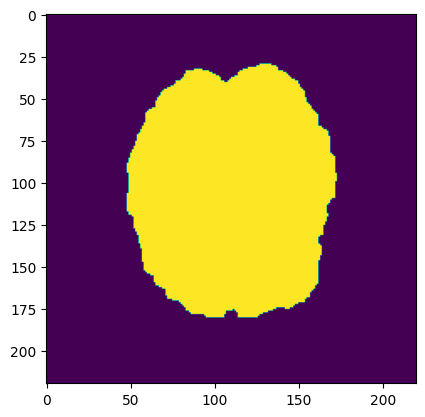

In [13]:
plt.imshow(ADNI_ds[0][1][32])

In [19]:
print(" ", voxels.shape[0], "\n", example_flair.view(-1).shape[0])

  447658 
 2807200


In [25]:
plt.style.use('fivethirtyeight')


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 290/290 [17:29<00:00,  3.62s/it]


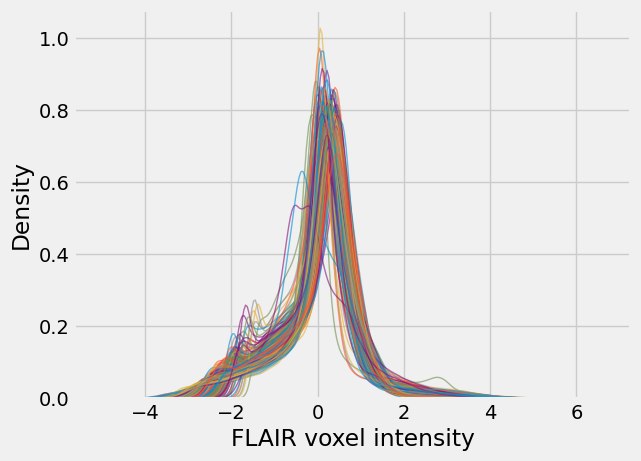

In [36]:
for i in tqdm(range(len(ADNI_ds)), position=0, leave=True):
    scan_id = i
    example_flair = ADNI_ds[scan_id][0]
    example_mask = ADNI_ds[scan_id][1] == 1

    # non zero voxels
    voxels = example_flair[example_mask & (example_flair != 0)]
    
    sns.kdeplot(voxels, linewidth=1, alpha=0.6)
    
    plt.xlabel("FLAIR voxel intensity")
plt.savefig("ADNI_post_norm_individual_intensities.pdf", bbox_inches="tight")

### loading the un-normalized ADNI data...

In [11]:
import os
import nibabel as nib
preproc_folder_path = "/home/s2208943/ipdis/data/preprocessed_data/ADNI_300/"
all_files = os.listdir(preproc_folder_path)

In [6]:
IDs = ["_".join(f.split("_")[:-1]) for f in all_files if "temp.txt" in f]

In [13]:
flair_paths = [f"{preproc_folder_path}{ID}_FLAIR_BET.nii.gz" for ID in IDs]
mask_paths = [f"{preproc_folder_path}{ID}_FLAIR_BET_mask.nii.gz" for ID in IDs]

In [25]:
idx = 0
flair_img = nib.load(flair_paths[idx])
mask_img = nib.load(mask_paths[idx])

In [26]:
flair_arr =flair_img.get_fdata()
mask_arr = mask_img.get_fdata()

In [27]:
flair_arr.shape

(256, 256, 35)

In [40]:
plt.style.use('fivethirtyeight')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 290/290 [14:38<00:00,  3.03s/it]


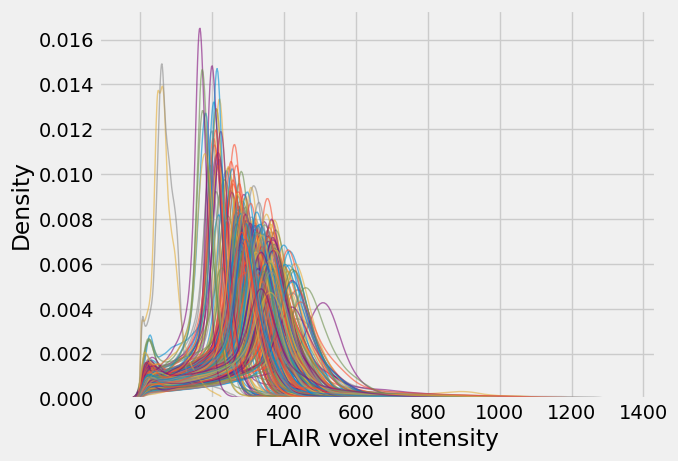

In [41]:
for idx in tqdm(range(len(IDs)), position=0, leave=True):
    example_flair = nib.load(flair_paths[idx]).get_fdata()

    # non zero voxels
    voxels = example_flair[example_flair != 0]
    
    sns.kdeplot(voxels, linewidth=1, alpha=0.6)
    
    plt.xlabel("FLAIR voxel intensity")
plt.savefig("ADNI_pre_norm_individual_intensities.pdf", bbox_inches="tight")

In [33]:
flair_voxels = flair_arr[flair_arr != 0]

<AxesSubplot: ylabel='Density'>

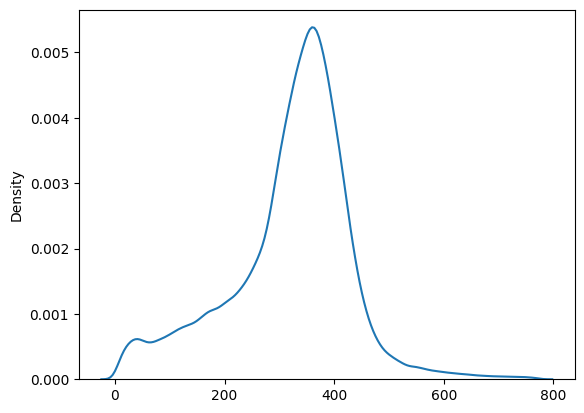

In [36]:
sns.kdeplot(flair_voxels)

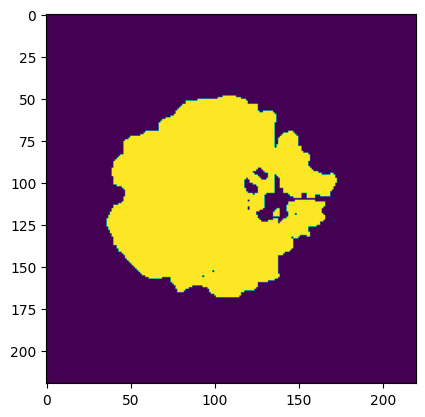

In [29]:
plt.imshow(mask_arr[:,:,20])